In [77]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
import sys
sys.path.append('../src')
from data.audio_dataset import AudioSpectrogramDataset
from models.WGAN_model.WPGAN import WPGAN
from models.WGAN_model.config import *

import torch
import librosa
import soundfile as sf
from torch.utils.data import DataLoader

In [79]:
dataset = AudioSpectrogramDataset(base_directory=base_directory, spectro_type='mel')
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [80]:
Music_WPGAN = WPGAN(
    latent_dim=latent_dim,
    output_dim=output_dim,
    lr=learning_rate,
    loss=loss,
    batch_size=batch_size,
    gpu=gpu,
    depths=depths, 
    negative_slope=negative_slope,
    fade_in_percentage=fade_in_percentage,
    save_interval=save_interval,
    normalization=normalization,
    mini_batch_normalization=mini_batch_normalization,
    epsilon_D=epsilon_D,
    gen_type=get_type,
    init_resolution_size=init_resolution_size,
    num_epochs_per_resolution=num_epochs_per_resolution,
    gen_output_dim=gen_output_dim,
    c=c,
    n_critic=n_critic
)

classname: ConvTranspose2d
classname: ConvTranspose2d
classname: ConvTranspose2d
classname: ConvTranspose2d
---
classname: Conv2d
classname: Conv2d
classname: Conv2d
classname: Conv2d
classname: Conv2d


In [81]:
Music_WPGAN.train(dataloader=dataloader)

Resolution 0 - Epoch 1/50 - D Loss: -0.014704952016472816 - G Loss: -0.0060757421888411045
Resolution 0 - Epoch 2/50 - D Loss: -0.03353111073374748 - G Loss: -0.002488850150257349
Resolution 0 - Epoch 3/50 - D Loss: -0.053454264998435974 - G Loss: 0.001625223085284233
Resolution 0 - Epoch 4/50 - D Loss: -0.07772208750247955 - G Loss: 0.006471152417361736
Resolution 0 - Epoch 5/50 - D Loss: -0.11134252697229385 - G Loss: 0.012831507250666618
Resolution 0 - Epoch 6/50 - D Loss: -0.15589839220046997 - G Loss: 0.021468784660100937
Resolution 0 - Epoch 7/50 - D Loss: -0.21732503175735474 - G Loss: 0.03030024841427803
Resolution 0 - Epoch 8/50 - D Loss: -0.30338016152381897 - G Loss: 0.043045446276664734
Resolution 0 - Epoch 9/50 - D Loss: -0.42883995175361633 - G Loss: 0.056196361780166626
Resolution 0 - Epoch 10/50 - D Loss: -0.6160668134689331 - G Loss: 0.06793787330389023
Checkpoint saved: c:\0. Studia\0. Praca inzynierska\Music_Samples_Generator\src\models\WGAN_model\checkpoints\PGAN_ch

In [82]:
# checkpoint_path = "../src/models/WGAN_model/checkpoints/PGAN_checkpoint_res0_epoch50.pth"
# Music_WPGAN.train(dataloader=dataloader, checkpoint_path=checkpoint_path)

In [83]:
Music_WPGAN.close_all_writers()

In [84]:
# Music_WPGAN.save_full_model("WPGAN")

In [85]:
Music_WPGAN.generator.eval()

PGenerator(
  (blocks): ModuleList(
    (0): ModuleList(
      (0): Sequential(
        (0): ConvTranspose2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): LeakyReLU(negative_slope=0.2)
      )
      (1): Sequential(
        (0): ConvTranspose2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): LeakyReLU(negative_slope=0.2)
      )
      (2): Sequential(
        (0): ConvTranspose2d(256, 1, kernel_size=(1, 1), stride=(1, 1))
      )
    )
    (1): ModuleList(
      (0): Sequential(
        (0): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): LeakyReLU(negative_slope=0.2)
      )
      (1): Sequential(
        (0): ConvTranspose2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): LeakyReLU(negative_slope=0.2)
      )
      (2): Sequential(
        (0): ConvTranspose2d(128, 1, kernel_size=(1, 1), stride=(1, 1))
      )
    )
    (2): ModuleList(
      (0): Sequential(
    

In [86]:
z = torch.randn(1, Music_WPGAN.latent_dim, 1, 1).to(Music_WPGAN.device)
generated_spectrogram = Music_WPGAN.generator(z)

In [87]:
spectrogram = generated_spectrogram.cpu().detach().numpy()
spectrogram = spectrogram.squeeze()

[Text(0.5, 1.0, 'WGAN generated mel-spectrogram')]

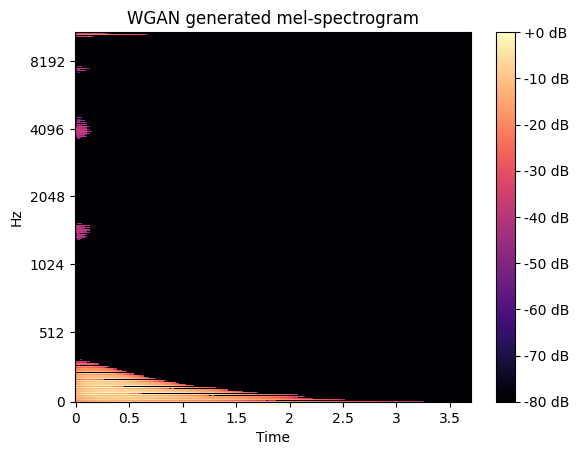

In [88]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

S_dB = librosa.power_to_db(spectrogram, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=22050, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='WGAN generated mel-spectrogram')

# plt.show()

In [89]:
audio = librosa.feature.inverse.mel_to_audio(spectrogram)

path = '../models/generated_samples/'
file_name = 'WPGAN_generated_audio11.wav'

sf.write(path + file_name, audio, 22050)